In [1]:
import numpy as np
from scipy import stats
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(m,ts=[1.1,1.2,1.3,1.4]):
    x = m/(13)**0.5
    return ts[0] * (1-x)**(ts[1]) * x**ts[2] * x**ts[3]*np.log(x)

In [3]:
def inverse_sample_decorator(dist):
    def wrapper(pnts, x_min=-100, x_max=100, n=1e5, **kwargs):
        x = np.linspace(x_min, x_max, int(n))
        cumulative = np.cumsum(dist(x, **kwargs))
        real_low = (cumulative/cumulative.max()).min()
        real_high = (cumulative/cumulative.max()).max()
        #print((cumulative/cumulative.max()).max(),(cumulative/cumulative.max()).min())
        f = interp1d(cumulative/cumulative.max(), x)
        return f(np.random.uniform(low=real_low, high=real_high, size=pnts))
    return wrapper

In [4]:
# First trying sampling from a simple gaussian distribution
@inverse_sample_decorator
def gauss(x, amp=1.0, mean=0.0, std=0.2):
    return amp*np.exp(-(x-mean)**2/std**2/2.0)

In [5]:
samples = gauss(5000, mean=20, std=0.8, x_min=19, x_max=21)

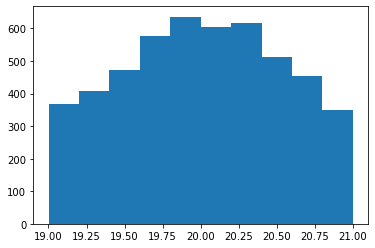

In [6]:
plt.hist(samples)
plt.show()

In [7]:
# Experimenting with Eq2
@inverse_sample_decorator
def f(x,ts=[1.1,1.2,1.3,1.4]):
    xx = x/(13)**0.5
    v = ts[0] * ((1-xx)**(ts[1])) * (xx**ts[2]) * (xx**(ts[3]*np.log(xx)))
    return v

In [8]:
sampless = f(500000,ts=[1.1,1.2,1.3,1.4],x_min=1/(13**0.5),x_max=7/(13**0.5))

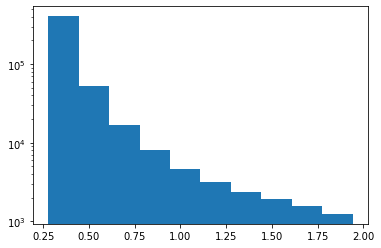

In [9]:
plt.hist(sampless, log=True)
plt.show()

[2.93432988 1.80351416 3.09313591 1.41504904]


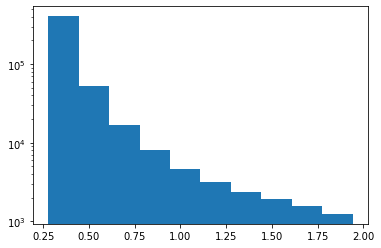

[1.51115734 2.79680343 2.89030349 2.66993154]


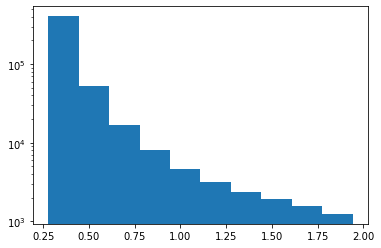

[2.2067345  1.24512273 2.8586095  2.84156392]


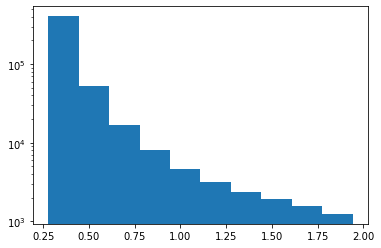

[1.96208038 1.3905608  1.97191047 2.76184532]


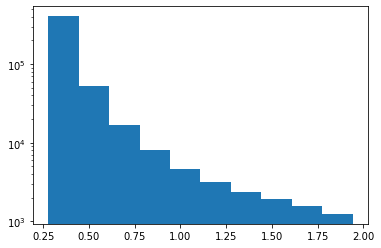

[2.98526089 2.9352105  1.88483609 2.10107315]


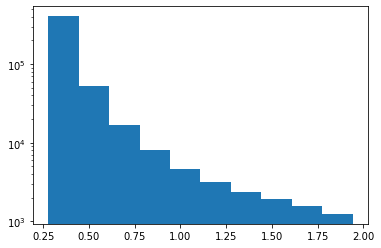

[2.43637434 1.34976865 1.46729618 1.1558726 ]


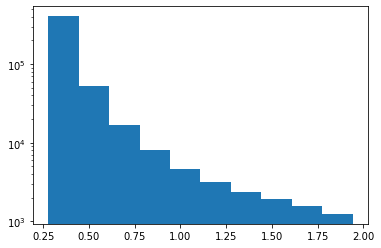

[3.04356646 2.13219355 2.26720583 1.63458276]


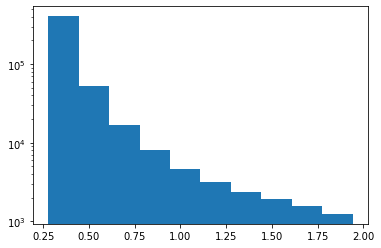

[2.31266636 1.82057488 1.41759058 2.38741907]


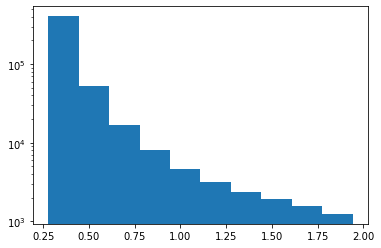

[1.58043638 1.19969507 1.3485036  2.292951  ]


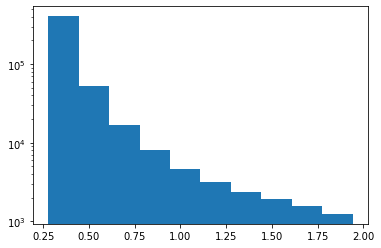

[1.26576907 2.53265877 1.36184364 2.52296033]


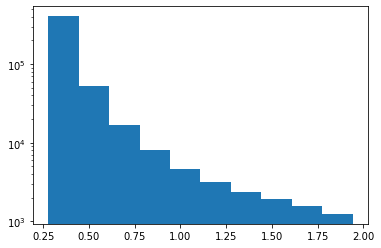

In [10]:
# Varing the theta values
# not sure the range that makes sense
for i in range(10):
    tsx = np.random.uniform(low=1.1, high=3.1, size=4)
    print(tsx)
    samplex = f(500000,ts=tsx,x_min=1/(13**0.5),x_max=7/(13**0.5)) 
    plt.hist(sampless, log=True)
    plt.show()